In [1]:
import pandas as pd

In [2]:
try:
    df = pd.read_csv('spam.csv', encoding='latin1')
except UnicodeDecodeError:
    print("Could not decode the file using 'latin1' encoding.")

In [3]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
df.drop(columns = ['Unnamed: 3','Unnamed: 4'],inplace=True)

In [5]:
df.head()

,v1,v2,Unnamed: 2
0,ham,"Go until jurong point, crazy.. Available only ...",NaN
1,ham,Ok lar... Joking wif u oni...,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN
3,ham,U dun say so early hor... U c already then say...,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN


In [6]:
df.rename(columns = {'v1':'target','v2':'text'},inplace = True)

In [7]:
df.sample(5)

,target,text,Unnamed: 2
4542,ham,I've been trying to reach him without success,NaN
2919,ham,"Thanx 4 the time weåÕve spent 2geva, its bin m...",NaN
5015,ham,Hey gals...U all wanna meet 4 dinner at nÌÂte?,NaN
3262,ham,So u gonna get deus ex?,NaN
3675,ham,Hey r Ì_ still online? I've finished the forma...,NaN


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
la = LabelEncoder()

In [10]:
df['target'] = la.fit_transform(df['target'])

In [11]:
df.sample(5)
df.drop(columns = ['Unnamed: 2',],inplace=True)

In [12]:
df.duplicated().sum()

403

In [13]:
df=df.drop_duplicates(keep='first')

 ## EDA

In [14]:
import matplotlib.pyplot as plt 

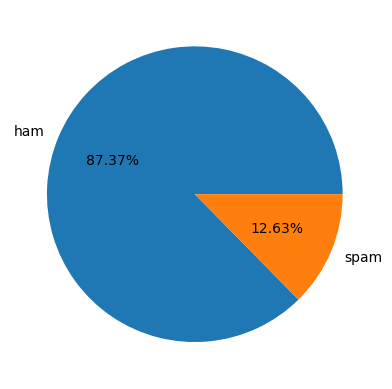

In [15]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f%%')
plt.show()

In [16]:
import nltk

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91862\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df['num_characters'] = df['text'].apply(len)

In [19]:
df.sample(5)

,target,text,num_characters
4922,0,Oh yah... We never cancel leh... Haha,38
1237,0,Is ur paper in e morn or aft tmr?,33
3773,0,Ok... But bag again..,21
781,0,"Hmmm ... I thought we said 2 hours slave, not ...",94
4656,1,PRIVATE! Your 2003 Account Statement for shows...,136


In [20]:
df['num_words']=df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [21]:
df['num_senten']=df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [22]:
df.head()

,target,text,num_characters,num_words,num_senten
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
df.describe()

,target,num_characters,num_words,num_senten
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [24]:
df[df['target']==0][['num_characters','num_words','num_senten']].describe()

,num_characters,num_words,num_senten
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
df[df['target']==1][['num_characters','num_words','num_senten']].describe()

,num_characters,num_words,num_senten
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [26]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

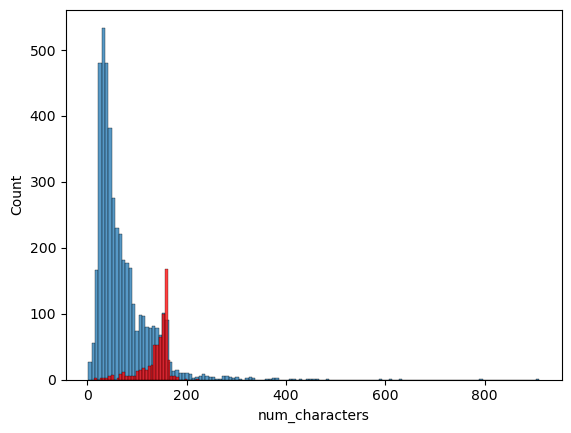

In [27]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

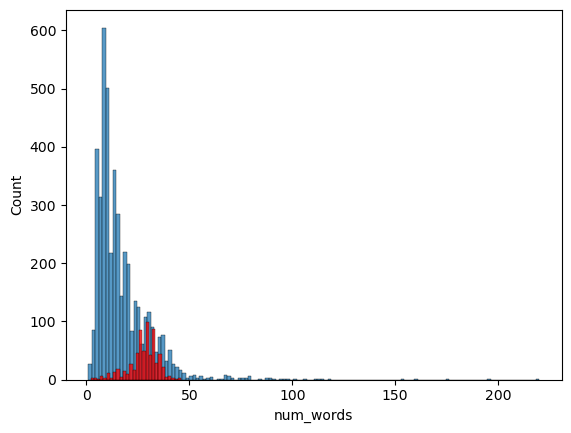

In [28]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')


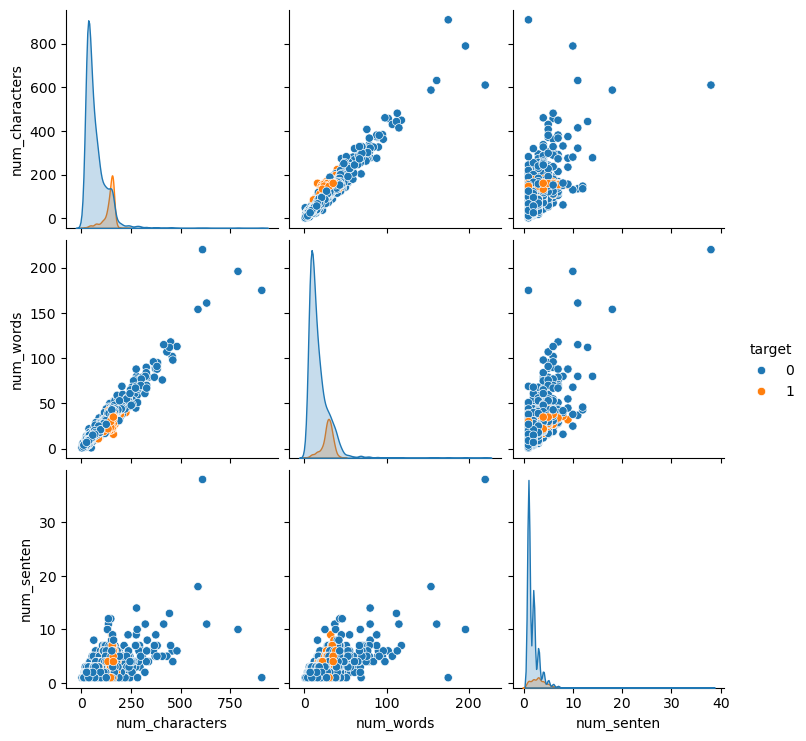

In [29]:
sns.pairplot(df,hue='target')

<Axes: >

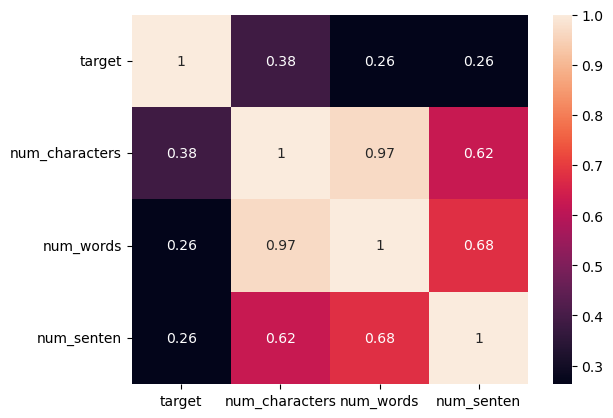

In [30]:
new = df[['target','num_characters','num_words','num_senten']]
sns.heatmap(new.corr(),annot=True)

In [31]:
# we will keep the num_charcter colums beause it is higliy co realted with target

## Data Preprocessing

In [32]:
def tarnsform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(po.stem(i))
        
    return " ".join(y)
    

In [33]:
from nltk.corpus import stopwords
import string

In [34]:
from nltk.stem.porter import PorterStemmer
po = PorterStemmer()

In [ ]:
df['transform_text'] = df['text'].apply(tarnsform)

In [ ]:
df.sample(5)

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 400,height = 500,min_font_size = 10,background_color = 'white')

In [ ]:
spam=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

In [ ]:
plt.imshow(spam)

In [ ]:
ham=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))

In [ ]:
plt.imshow(ham)

In [ ]:
df.head()

In [ ]:
spam_cor = []
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_cor.append(word)

In [ ]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_cor).most_common(10))[0], y=pd.DataFrame(Counter(spam_cor).most_common(10))[1])
plt.show()

In [ ]:
ham_cor = []
for msg in df[df['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_cor.append(word)

In [ ]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_cor).most_common(10))[0], y=pd.DataFrame(Counter(ham_cor).most_common(10))[1])
plt.show()

## Model Building 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv= CountVectorizer()
tv = TfidfVectorizer(max_features=3000)

In [ ]:
x = tv.fit_transform(df['transform_text']).toarray()
print(x)

In [ ]:
x.shape

In [ ]:
y = df['target'].values
y

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
be = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
f1 = f1_score(y_test,y_pred1)
print(f1)

In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
f1 = f1_score(y_test,y_pred2)
print(f1)

In [ ]:
be.fit(X_train,y_train)
y_pred3 = be.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
f1 = f1_score(y_test,y_pred3)
print(f1)

In [ ]:
# we go with multinomial beacuse precision score is good

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'KN' : knc, 
    'NB': mnb, 
    'RF': rfc, 
    'ETC': etc }

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    
    return accuracy,precision,f1

In [ ]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score
accuracy_scores = []
precision_scores = []
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    
    # Append the scores to the respective lists
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1


In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df

In [ ]:
import numpy as np

# Function to preprocess and predict
def predict_spam(text):
    # Preprocessing
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(po.stem(i))
        
    transformed_text = " ".join(y)
    
    # Transform the text into the same vector space as the training data
    transformed_vector = tv.transform([transformed_text]).toarray()
    
    # Predict using the trained Naive Bayes model
    prediction = be.predict(transformed_vector)
    
    # Return the prediction result
    return "Spam" if prediction[0] == 1 else "Not Spam"

# Example usage
input_text = input("Enter the SMS or email text to predict: ")
result = predict_spam(input_text)
print(f"The message is predicted to be: {result}")
